<a href="https://colab.research.google.com/github/AatkaMeraj/FlipItNews_NLP/blob/main/FlipItNews_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About FlipItNews

**The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors.**



# Problem Statement

**The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.**

# Dataset Download

In [ ]:
!gdown https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u

Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 18.7MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('flipitnews-data.csv')


In [ ]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df.shape

(2225, 2)

In [ ]:
df['Category'].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


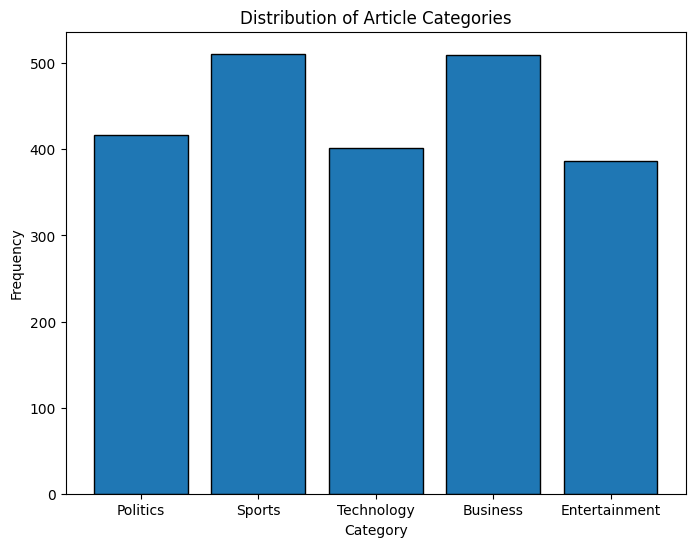

In [ ]:
import matplotlib.pyplot as plt

article_categories = ['Politics', 'Sports', 'Technology', 'Business', 'Entertainment']
category_counts = [417, 511, 401, 510, 386]

plt.figure(figsize=(8, 6))

plt.bar(article_categories, category_counts, edgecolor='black')

plt.title("Distribution of Article Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")

plt.show()


**Sports category has maximum number of articles, closely followed by business.**

**Entertainment has the least number of articles.**

# Pre-processing the Article

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
nltk.download('wordnet')


# Initialize NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):

    # convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    words = text.split()

    # Lemmatize and remove stop words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply preprocessing to the 'article' column
df['cleaned_article'] = df['Article'].apply(preprocess_text)

# Encode the target variable
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head()

,Category,Article,cleaned_article,category_encoded
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


#Encoding and Transforming data


# Bag of Words

To vectorize data using the Bag-of-Words (BoW) model, we convert text data into a numerical representation where each unique word is represented by a column. Each article is represented as a row, and each cell contains the frequency of a word in that article.

CountVectorizer from scikit-learn is used to vectorize document from text to numeric representation.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data to BoW
X = vectorizer.fit_transform(df['cleaned_article'])

# Convert to DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the vocabulary and the BoW DataFrame
print("Vocabulary:", vectorizer.get_feature_names_out())
print("\nBag-of-Words DataFrame:\n", bow_df)


Vocabulary: ['aa' 'aaa' 'aac' ... 'zutons' 'zvonareva' 'zvyagintsev']

Bag-of-Words DataFrame:
       aa  aaa  aac  aadc  aaliyah  aaltra  aamir  aan  aara  aarhus  ...  \
0      0    0    0     0        0       0      0    0     0       0  ...   
1      0    0    0     0        0       0      0    0     0       0  ...   
2      0    0    0     0        0       0      0    0     0       0  ...   
3      0    0    0     0        0       0      0    0     0       0  ...   
4      0    0    0     0        0       0      0    0     0       0  ...   
...   ..  ...  ...   ...      ...     ...    ...  ...   ...     ...  ...   
2220   0    0    0     0        0       0      0    0     0       0  ...   
2221   0    0    0     0        0       0      0    0     0       0  ...   
2222   0    0    0     0        0       0      0    0     0       0  ...   
2223   0    0    0     0        0       0      0    0     0       0  ...   
2224   0    0    0     0        0       0      0    0     0       0 

#TF-IDF Technique

The TF-IDF (Term Frequency-Inverse Document Frequency) technique assigns a weight to each word based on its importance in a document relative to the entire corpus. It’s often preferred over the Bag of Words model as it emphasizes unique words in each document rather than just their frequency.

Using TfidfVectorizer from scikit-learn, we can vectorize text data into a TF-IDF matrix.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data to TF-IDF
X = vectorizer.fit_transform(df['cleaned_article'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the vocabulary and the TF-IDF DataFrame
print("Vocabulary:", vectorizer.get_feature_names_out())
print("\nTF-IDF DataFrame:\n", tfidf_df)


Vocabulary: ['aa' 'aaa' 'aac' ... 'zutons' 'zvonareva' 'zvyagintsev']

TF-IDF DataFrame:
        aa  aaa  aac  aadc  aaliyah  aaltra  aamir  aan  aara  aarhus  ...  \
0     0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
1     0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
2     0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
3     0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
4     0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
...   ...  ...  ...   ...      ...     ...    ...  ...   ...     ...  ...   
2220  0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
2221  0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
2222  0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
2223  0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0     0.0  ...   
2224  0.0  0.0  0.0   0.0      0.0     0.0    0.0  0.0   0.0   

#Model Training and Evaluation

# Simple Approach- Naive Bayes

The Naive Bayes classifier is a probabilistic model that uses Bayes' theorem to predict the class of a given instance. It assumes that all features are independent, which is the "naive" aspect of the model. Based on this assumption, the classifier calculates the probability of each class given the feature values.

 During prediction, the class with the highest probability is selected as the predicted label. Naive Bayes is especially efficient with text classification tasks, due to its simplicity and fast computation, even with large datasets.

In [ ]:
# train a Naive-Bayes classifier

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_article'])
y = df['category_encoded']


# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [ ]:
X_train.shape

(1780, 27177)

In [ ]:
X_test.shape

(445, 27177)

**The shape of the train and test is (1780, 27177) and (445, 27177) respectively.**

In [ ]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test)


Accuracy: 0.9640449438202248

Classification Report:
                precision    recall  f1-score   support

     Business       0.96      0.95      0.96       101
Entertainment       1.00      0.89      0.94        81
     Politics       0.92      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.95      0.99      0.97        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.97      0.96      0.96       445



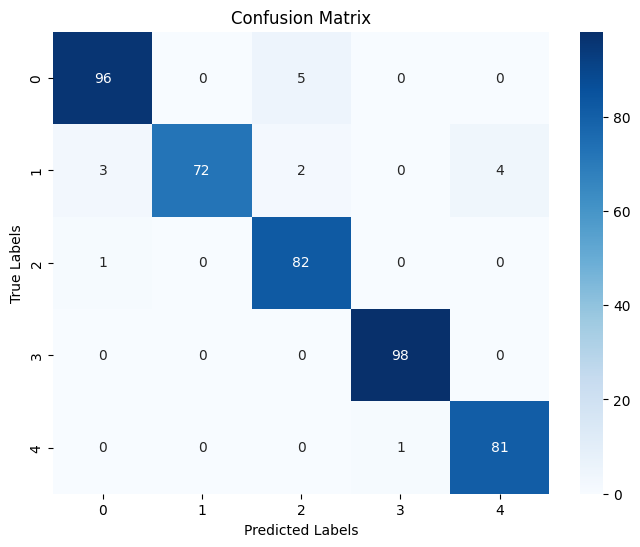

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Precision measures the accuracy of positive predictions for each category.
Precision of all the categories are over 90%. Entertainment has a perfect precision of 1.00, meaning all predicted Entertainment articles were correctly classified.

Recall(sensitivity) shows the model's ability to find all relevant instances in each category. All the categories have good recall, Sports has a recall of 1.00, indicating all Sports articles were correctly identified.

F1-Score is the harmonic mean of precision and recall, providing a single measure of a category’s performance. A high F1-score indicates balanced precision and recall. All categories have a good amount of recall.

Support is the number of actual instances of each category in the test set.

**The overall accuracy of the model is 0.96, meaning 96% of all articles were correctly classified.**



# FUNCTIONALIZED CODE



# 1. Decision Trees

A Decision Tree classifier is a supervised machine learning algorithm that classifies data by splitting it into subsets based on the feature values. Each path from the root to a leaf node represents a classification rule.

The algorithm begins by examining all features and selecting the one that best divides the data into distinct categories, by using Gini impurity or entropy. This feature becomes the root node.

 The data is then recursively split at each level, creating decision nodes and branches based on the feature values. This process continues until a stopping condition is met, such as achieving pure nodes, reaching a maximum depth, or having too few samples in a node. When these conditions are met, nodes become leaf nodes, each representing the final classification.


In [ ]:
# train a Decision Tree classifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_article'])
y = df['category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)


Accuracy: 0.8426966292134831

Classification Report:
                precision    recall  f1-score   support

     Business       0.81      0.82      0.82       101
Entertainment       0.88      0.79      0.83        81
     Politics       0.81      0.83      0.82        83
       Sports       0.92      0.93      0.92        98
   Technology       0.79      0.83      0.81        82

     accuracy                           0.84       445
    macro avg       0.84      0.84      0.84       445
 weighted avg       0.84      0.84      0.84       445



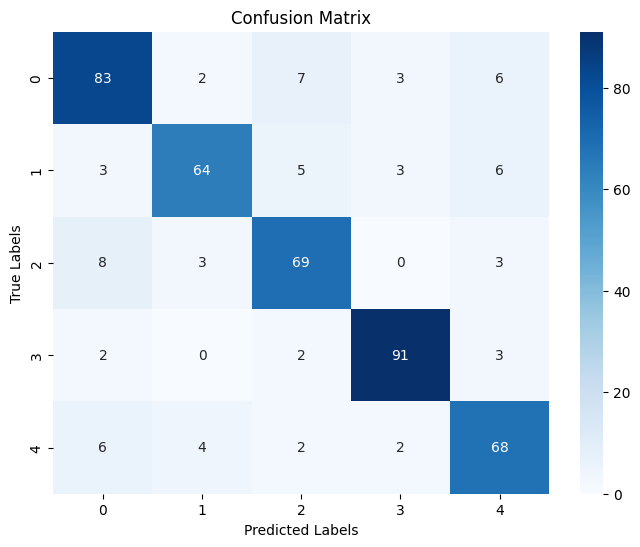

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


The model performs well overall, particularly in Sports. It could improve in recall for categories like Entertainment and Technology where relevant articles were occasionally missed.

**The overall accuracy of the Decision Tree model is 84%, which is less than the Naive Bayes model.**

# 2. Nearest Neighbour Classifier

A Nearest Neighbor(k-NN) Classifier is a simple yet effective classification algorithm that classifies a data point based on the similarity between it and other articles in the dataset.

For text-based classification tasks like article classification, k-NN works by comparing each article’s vectorized features (like TF-IDF or word embeddings) and finding the "k" most similar articles to predict its category.

 The algorithm calculates the distance between the new article and all articles in the training set, often using metrics like Euclidean distance or cosine similarity. The "k" nearest articles are identified, and the new article is assigned to the category that most of these neighbors belong to, following a majority voting approach.

In [ ]:
# training a knn classifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = df['cleaned_article']
y = df['category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the articles using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='cosine')

# Train the k-NN classifier
knn_classifier.fit(X_train_tfidf, y_train)

# Predict categories for the test set
y_pred = knn_classifier.predict(X_test_tfidf)



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 93.48%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       101
           1       0.95      0.94      0.94        81
           2       0.86      0.90      0.88        83
           3       0.98      1.00      0.99        98
           4       0.94      0.96      0.95        82

    accuracy                           0.93       445
   macro avg       0.93      0.94      0.93       445
weighted avg       0.94      0.93      0.93       445



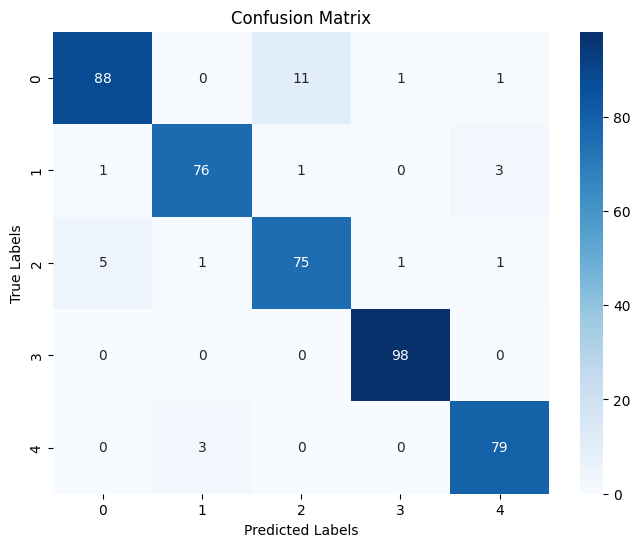

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix for the knn classifier
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

The KNN model demonstrates strong performance, particularly for classes 1 and 3, which show high precision and recall. Class 2 appears slightly weaker, indicating some room for improvement.

**The overall accuracy of 93.48% suggests the model is effective at classifying articles into their respective categories, with good balance and performance across the different metrics.**

# 3. Random Forest Classifier

A Random Forest Classifier is an ensemble learning method primarily used for classification. It creates multiple decision trees and combines their predictions for more accurate and stable results. This technique leverages ensemble learning by training each tree on a random subset of the training data, enhancing performance compared to individual models.

In [ ]:
# random forest classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df['cleaned_article']
y = df['category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

y_pred = rf_classifier.predict(X_test_vectorized)



Accuracy: 95.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       101
           1       1.00      0.90      0.95        81
           2       0.93      0.95      0.94        83
           3       0.99      0.99      0.99        98
           4       0.97      0.95      0.96        82

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



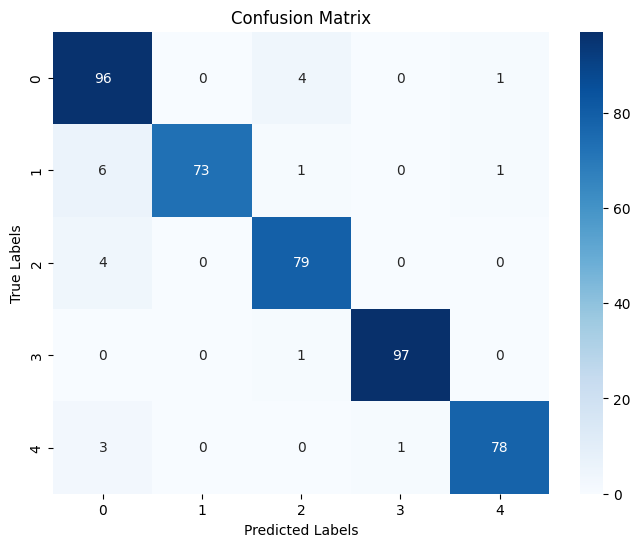

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


This classification report demonstrates that the Random Forest model performs well on a multi-class classification task, achieving an overall accuracy of 95.06%. The precision, recall, and F1-score values are consistently high across all classes, indicating accurate and balanced predictions.

**From among the Classic Naive Bayes, KNN, Decision Trees and Random Forest Classifier, the best performance is given by the Naive Bayes' classifier with 96% accuracy. Random Forest classifier also had a decent accuracy of 95%.**

**Decision Tree classifier gave an accuracy of only 84%.**


# Word2Vec Model

In a Word2Vec model, first each article is converted to lowercase, tokenized, and lemmatized to produce a list of standardized word tokens.

Then a Word2Vec model is trained on these tokenized articles, enabling the model to generate word embeddings, which are dense vector representations that capture the semantic meaning of words based on their context.

After training the Word2Vec model, document vectors are created for each article by averaging the word vectors of the tokens contained within the article. This average vector serves as a summary representation of the article's content.

Then a classifier is trained using these document vectors to predict categories for new articles.



In [ ]:
# word2vec to classify articles

import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

articles = df['Article']
categories = df['category_encoded']

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize each article
tokenized_articles = [word_tokenize(article.lower()) for article in articles]

# lemmatize the article
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tokenized_articles = [
    [lemmatizer.lemmatize(word) for word in word_tokenize(article.lower()) if word.isalpha() and word not in stop_words]
    for article in articles
]

# Train a Word2Vec model on the tokenized articles
word2vec_model = Word2Vec(sentences=tokenized_articles, vector_size=100, window=5, min_count=1, workers=4)

# Create document vectors by averaging word vectors
def get_document_vector(tokens, model):

    valid_tokens = [token for token in tokens if token in model.wv]

    if valid_tokens:
        return np.mean(model.wv[valid_tokens], axis=0)
    else:

        return np.zeros(model.vector_size)

document_vectors = np.array([get_document_vector(tokens, word2vec_model) for tokens in tokenized_articles])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(document_vectors, categories, test_size=0.2, random_state=42)

# Train  Random Forest classifier on the document vectors
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict categories for the test set
y_pred = classifier.predict(X_test)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 86.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       101
           1       0.76      0.72      0.74        81
           2       0.86      0.92      0.89        83
           3       0.92      0.87      0.89        98
           4       0.84      0.91      0.88        82

    accuracy                           0.86       445
   macro avg       0.86      0.86      0.86       445
weighted avg       0.86      0.86      0.86       445



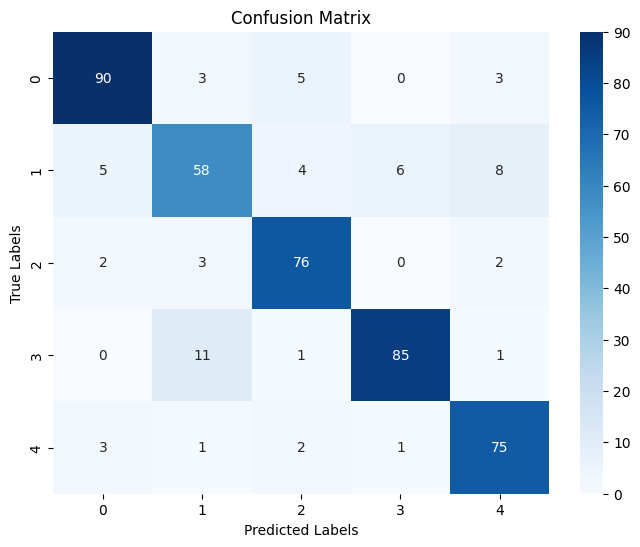

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(categories), yticklabels=set(categories))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

We are getting an accuracy of 86% with the basic Word2Vec and Random Forest model.

So we will try some tuning to improve the model's accuracy.

# Tuning the Word2Vec Model for better Accuracy

To improve the model's accuracy by experimenting with the Word2Vec hyperparameters.

Also instead of simple averaging, weight each word vector by its TF-IDF score in the article.

In [ ]:
# improving word2vec model

import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

articles = df['Article']
categories = df['category_encoded']

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize each article
tokenized_articles = [word_tokenize(article.lower()) for article in articles]

# lemmatize the article
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tokenized_articles = [
    [lemmatizer.lemmatize(word) for word in word_tokenize(article.lower()) if word.isalpha() and word not in stop_words]
    for article in articles
]

# change the hyperparameters of the model
word2vec_model = Word2Vec(sentences=tokenized_articles, vector_size=200, window=10, min_count=2, workers=4)

# instead of averaging word vectors, we use TF-IDF Weighted Averaging

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(articles)
tfidf_dict = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

def get_weighted_document_vector(tokens, model, tfidf_dict):
    valid_tokens = [token for token in tokens if token in model.wv]
    if valid_tokens:
        weights = [tfidf_dict.get(token, 1.0) for token in valid_tokens]
        weighted_vectors = np.array([model.wv[token] * weight for token, weight in zip(valid_tokens, weights)])
        return np.mean(weighted_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(document_vectors, categories, test_size=0.2, random_state=42)

# Train  Random Forest classifier on the document vectors
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict categories for the test set
y_pred = classifier.predict(X_test)

Accuracy: 93.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       101
           1       0.95      0.94      0.94        81
           2       0.91      0.96      0.94        83
           3       1.00      0.93      0.96        98
           4       0.95      0.94      0.94        82

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



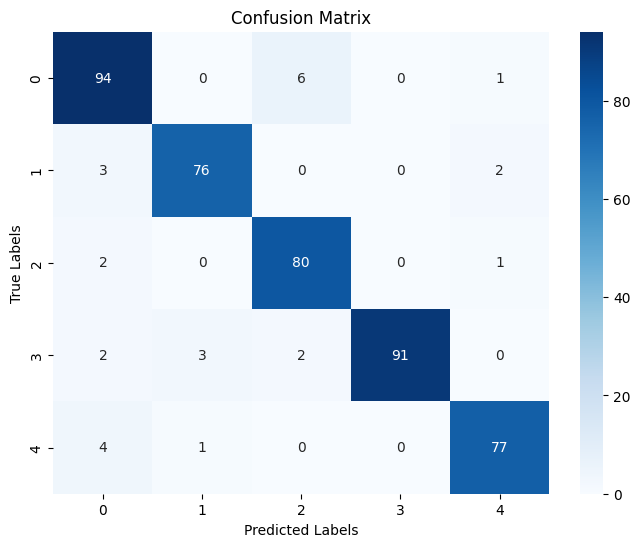

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(categories), yticklabels=set(categories))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

After applying tuning to the Word2Vec model, there is a drastic improvement in performance of the model.

Precision values range from 0.90 (class 0) to 1.00 (class 3), showing high accuracy across all classes.

Recall values are also high, with class 2 achieving the highest at 0.96, indicating the model successfully retrieves most relevant instances for each class.

F1-Score is strong across all classes, with values ranging from 0.91 to 0.96, signifying a balanced performance.

**Also the overall accuracy of the model is around 94%, which is quite high as compared to the model before tuning.**

# Questionnaire

**1.How many news articles are present in the dataset that we have?**

There are 2225 articles in the dataset.

**2.Most of the news articles are from ______ category.**

Most of the news articles are from Sports category with 511, closely followed by Business category with 510 articles.

**3.Only ___ no. of articles belong to the ‘Technology’ category.**

Only 401 no. of articles belong to the ‘Technology’ category.

**4. What are Stop Words and why should they be removed from the text data?**

Stop words are common words (like "the," "is," "and") that appear frequently in text but carry little meaning on their own. They are usually removed from text data to reduce noise and improve processing efficiency, allowing the model to focus on more informative words.

**5. Explain the difference between Stemming and Lemmatization.**

Lemmatization considers the context and transforms words to their dictionary form (e.g., "running" becomes "run"), producing more accurate and readable results than stemming.

**6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**

TF-IDF is often considered more efficient than Bag of Words because it not only considers word presence but also adjusts for the importance of each word by reducing the influence of commonly occurring terms, resulting in a better representation of text relevance.

**7. What’s the shape of train & test data sets after performing a 75:25 split.**

The size of the train set after 80:20 split is 1780 and that of the test set is 445.

**8. Which of the following is found to be the best performing model.
a. Random Forest b. Nearest Neighbors c. Naive Bayes**

Naive Bayes is the best model with 96% accuracy. Random forest has 95% and Knn has an accuracy of 93%.

**9. According to this particular use case, both precision and recall are equally important. (T/F)**

The statement is True, as for multi-class classification of news articles, precision and recall are equally important. Precision ensures that each category’s predictions are accurate, avoiding false positives, while recall ensures that the model identifies all instances of each category, avoiding false negatives. Balancing both metrics leads to a comprehensive and reliable model, especially when all categories are significant and misclassifying any article can impact the quality of the classification system.




# Insights

**Sports category has maximum number of articles, closely followed by business.**

**Entertainment has the least number of articles.**

**The shape of the train and test is (1780, 27177) and (445, 27177) respectively.**


**NAIVE BAYES' MODEL**

Precision measures the accuracy of positive predictions for each category.
Precision of all the categories are over 90%. Entertainment has a perfect precision of 1.00, meaning all predicted Entertainment articles were correctly classified.

Recall(sensitivity) shows the model's ability to find all relevant instances in each category. All the categories have good recall, Sports has a recall of 1.00, indicating all Sports articles were correctly identified.

F1-Score is the harmonic mean of precision and recall, providing a single measure of a category’s performance. A high F1-score indicates balanced precision and recall. All categories have a good amount of recall.

Support is the number of actual instances of each category in the test set.

**The overall accuracy of the model is 0.96, meaning 96% of all articles were correctly classified.**


**DECISION TREE MODEL**

The model performs well overall, particularly in Sports. It could improve in recall for categories like Entertainment and Technology where relevant articles were occasionally missed.

**The overall accuracy of the Decision Tree model is 84%, which is less than the Naive Bayes model.**


**NEAREST NEIGHBOUR MODEL**

The KNN model demonstrates strong performance, particularly for classes 1 and 3, which show high precision and recall. Class 2 appears slightly weaker, indicating some room for improvement.

**The overall accuracy of 93.48% suggests the model is effective at classifying articles into their respective categories, with good balance and performance across the different metrics.**

**RANDOM FOREST MODEL**


The Random Forest model performs well on a multi-class classification task, achieving an overall accuracy of 95.06%. The precision, recall, and F1-score values are consistently high across all classes, indicating accurate and balanced predictions.

**From among the Classic Naive Bayes, KNN, Decision Trees and Random Forest Classifier, the best performance is given by the Naive Bayes' classifier with 96% accuracy. Random Forest classifier also had a decent accuracy of 95%.**

**Decision Tree classifier gave an accuracy of only 84%.**


**Word2Vec WITH RANDOM FOREST MODEL**

Precision values range from 0.90 (class 0) to 1.00 (class 3), showing high accuracy across all classes.

Recall values are also high, with class 2 achieving the highest at 0.96, indicating the model successfully retrieves most relevant instances for each class.

F1-Score is strong across all classes, with values ranging from 0.91 to 0.96, signifying a balanced performance.

**Also the overall accuracy of the model is around 94%, which is quite high as compared to the model before tuning, which was only 86%.**



# Recommendations

**1. Sports and Business Categories**

 Since these categories have the most articles, models should be trained to leverage this higher representation for better feature extraction and consistency in predictions. High-performing models like Naive Bayes and Random Forest are effective choices here, as they capitalize on the model's familiarity with well-represented categories.

**2. Entertainment Category**

With fewer articles, Entertainment may suffer from under-representation, which could impact recall. Consider using data augmentation or collecting more samples in this category to improve recall and balance in prediction accuracy across categories.

**3. Model Selection**

**Naive Bayes:** With the highest overall accuracy (96%), Naive Bayes appears well-suited for this dataset. Its strong performance, especially in Entertainment, shows it handles balanced and imbalanced categories effectively.

**Random Forest:** Also a strong choice with 95% accuracy, Random Forest demonstrates robust performance across categories, making it a good secondary model if ensemble learning or model combination is feasible.

**Decision Tree:** Given its lower accuracy (84%), Decision Trees may need more fine-tuning or deeper adjustments to improve recall in categories like Entertainment and Technology. Alternatively, this model might be less suitable for this classification task.

**K-Nearest Neighbors (KNN):** While achieving good accuracy (93.48%), KNN could benefit from fine-tuning in underperforming categories. This might involve experimenting with different values of k or weighting methods.

**Word2Vec with Random Forest:** The Word2Vec and Random Forest combination achieved a notable improvement, especially after tuning (94% accuracy). This model captures semantic nuances in text, making it well-suited for article classification. It’s recommended to further tune Word2Vec parameters (e.g., vector size, window size) and assess if larger embeddings improve accuracy.

**Ensemble Learning:** For overall improvements, consider using an ensemble approach by combining Naive Bayes, Random Forest, and KNN. This can potentially leverage the strengths of each model and enhance classification performance across all categories.